### Read Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_fruit=pd.read_excel('../Dataset Supervised/fruit.xlsx')

In [3]:
df_fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [4]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
df_fruit.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
#membaca object apa saja yang ada pada kolom species(dependen)
pd.unique(df_fruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [7]:
#menghitung jumlah object yang ada pada kolom species
df_fruit['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

### Split dependen (Target/label) independen(atribut) variabel

In [8]:
# x = df_fruit.iloc[:,1:].values
# y = df_fruit.iloc[:,[0]].values

x = df_fruit.drop(columns=['name']).values
y = df_fruit['name'].values

<function matplotlib.pyplot.show(close=None, block=None)>

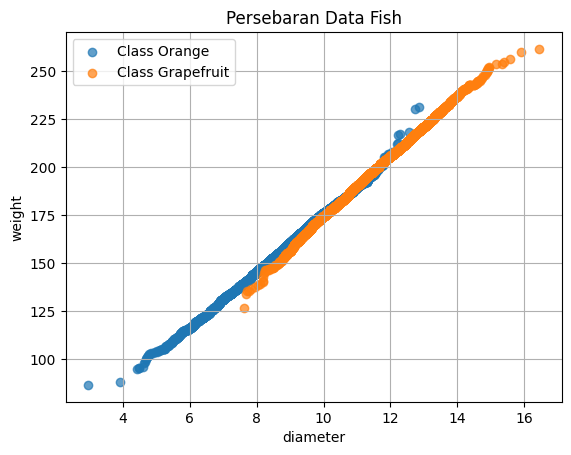

In [10]:
class1 = df_fruit[df_fruit['name']=='orange']
class2 = df_fruit[df_fruit['name']=='grapefruit']

plt.scatter(class1['diameter'],class1['weight'],label='Class Orange',alpha=0.7)
plt.scatter(class2['diameter'],class2['weight'],label='Class Grapefruit',alpha=0.7)
plt.xlabel('diameter')
plt.ylabel('weight')
plt.title('Persebaran Data Fish')
plt.legend()
plt.grid(True)
plt.show

### Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Split Train Test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Klasifikasi knn

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC(kernel='rbf', C=10, gamma=10).fit(x_train,y_train)
model

SVC(C=10, gamma=10)

### Prediksi/test

In [15]:
y_prediksi = model.predict(x_test)

### Cek akurasi

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb


In [17]:
print("Nilai AKurasi : ",accuracy_score(y_test,y_prediksi))

Nilai AKurasi :  0.957


### Mencari Kernel Terbaik

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel' : ['rbf','poly','sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator= SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=3,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(random_state=0), n_jobs=3,
             param_grid={'C': [0.5, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [19]:
print(f'Best Score: {grid_search.best_score_}')

best_param = grid_search.best_estimator_.get_params()
print(f'Best Parameters: ')
for param in parameters:
    print(f'\t{param}: {best_param[param]}')

Best Score: 0.969
Best Parameters: 
	kernel: rbf
	C: 100
	gamma: scale


              precision    recall  f1-score   support

  grapefruit       0.94      0.98      0.96      1012
      orange       0.97      0.94      0.96       988

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



<Axes: >

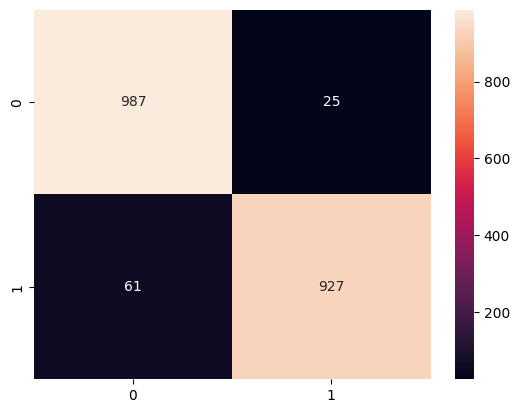

In [20]:
print(classification_report(y_test,y_prediksi))
sb.heatmap(confusion_matrix(y_test,y_prediksi),annot=True,fmt='g')

### Klasifikasi data baru

In [25]:
new_data = [[2.96,86.76,172,85,2]]
new_data = scaler.transform(new_data)
new_pred = model.predict(new_data)
print(new_pred)
2.96,86.76,172,85,2

['orange']


(2.96, 86.76, 172, 85, 2)

In [26]:
import pickle

pickle.dump(model,open('fruit_svm.sav','wb'))
pickle.dump(scaler,open('fruit_svmScaler.sav','wb'))
